In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem Statement

GoodLife is a fitness club chain in Canada. GoodLife has reached out to you to help them optimize their Gym utilization and hence maximize client satisfaction and profits. 

#### Key Points to consider:
- GoodLife offers a range of fitness classes in two capacities - 25 and 15.
- Some classes are always fully booked. Fully booked classes often have a low attendance rate.
- GoodLife wants to increase the number of spaces available for classes.
- They want to do this by predicting whether the member will attend the class or not.
- If they can predict a member will not attend the class, they can make another space
available.

In [378]:
class_attendance_df = pd.read_csv('./dataset/problem2.csv')

In [379]:
class_attendance_df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


- booking_id - Nominal. The unique identifier of the booking.
- months_as_member - Discrete. The number of months as this fitness club member, minimum 1 month.
- weight -Continuous. The member's weight in kg, rounded to 2 decimal places.
- days_before - Discrete. The number of days before the class the member registered,
- day_of_week - Nominal. The day of the week of the class.
- time - Ordinal. The time of day of the class. Either AM or PM
- category - Nominal. The category of the fitness class.
- attended - Nominal. Whether the member attended the class (1) or not (0)

In [380]:
class_attendance_df.shape

(1500, 8)

In [381]:
class_attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [382]:
# Dropping unnecessary columns
class_attendance_df = class_attendance_df.drop(columns='booking_id', axis=1)

In [383]:
# Checking for missing values
class_attendance_df.isnull().sum()

months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [384]:
# Filling missing values with the average weight
class_attendance_df['weight']= class_attendance_df['weight'].fillna(class_attendance_df['weight'].mean())

In [385]:
class_attendance_df.isnull().sum()

months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

#### Checking features

In [386]:
class_attendance_df.months_as_member.unique()

array([ 17,  10,  16,   5,  15,   7,  11,   9,  23,  13,   8,  22,   6,
        33,  24,  14,   2,  12,  26,  28,  27,   1,   3,  21,  18,  19,
        53,  20,  34,  25,  32,  73,  55,   4,  35,  54,  76,  62,  42,
       105,  90,  29,  60,  30, 107,  52,  37,  38,  48,  51,  40,  89,
        57,  36,  44,  39,  41,  47,  58,  66,  45,  43,  61,  50,  65,
        31,  97,  59,  93, 148, 111,  69])

In [387]:
class_attendance_df.days_before.unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

In [388]:
class_attendance_df['days_before'] = class_attendance_df['days_before'].str.replace('days', '').astype(int)
class_attendance_df.days_before.unique()

array([ 8,  2, 14, 10,  6,  4,  9, 12,  5,  3,  7, 13, 20,  1, 15, 11, 16,
       17, 29])

In [389]:
class_attendance_df.day_of_week.unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [390]:
# Extracting the first three characters of the day_of_week column
class_attendance_df['day_of_week'] = class_attendance_df['day_of_week'].str[:3]
class_attendance_df.day_of_week.unique()

day_mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

class_attendance_df['day_of_week'] = class_attendance_df['day_of_week'].apply(lambda x: day_mapping.get(x))

In [391]:
class_attendance_df.time.unique()

array(['PM', 'AM'], dtype=object)

In [392]:
class_attendance_df.category.unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

In [393]:
class_attendance_df.attended.value_counts()

attended
0    1046
1     454
Name: count, dtype: int64

### Data Visualization

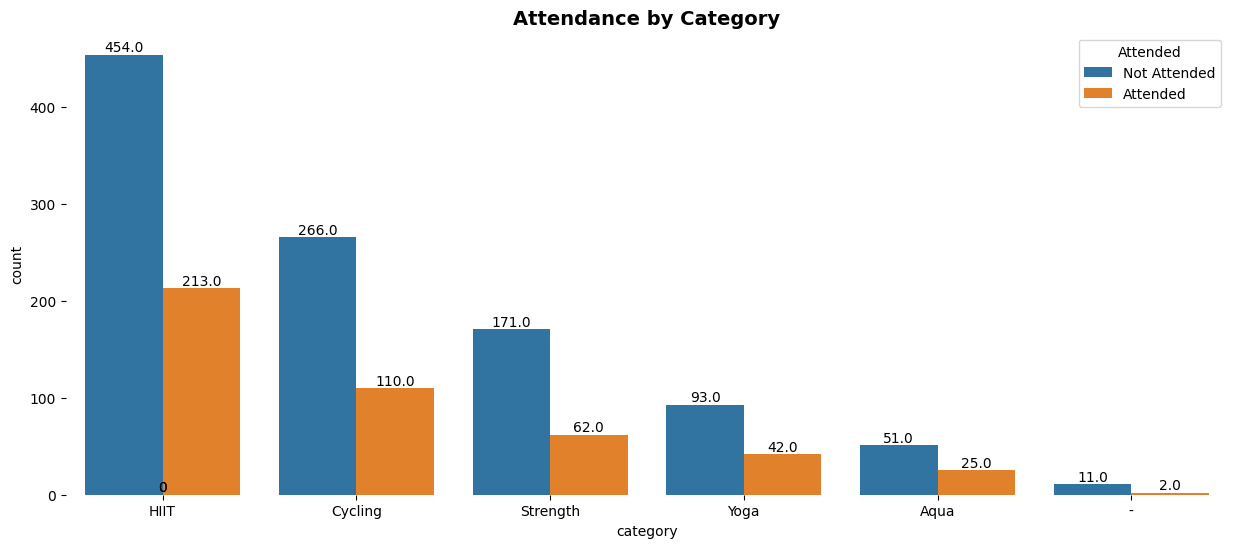

In [394]:
# Calculate the counts for each category
category_counts = class_attendance_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
category_counts = category_counts.sort_values(by='count', ascending=False)
plt.figure(figsize =(15,6))
ax = sns.countplot(data=class_attendance_df, x='category', hue='attended', order=category_counts['category'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title('Attendance by Category', size=14, weight="bold")
plt.legend(title='Attended', labels=['Not Attended', 'Attended'])
sns.despine(left=True, bottom=True)
plt.show()

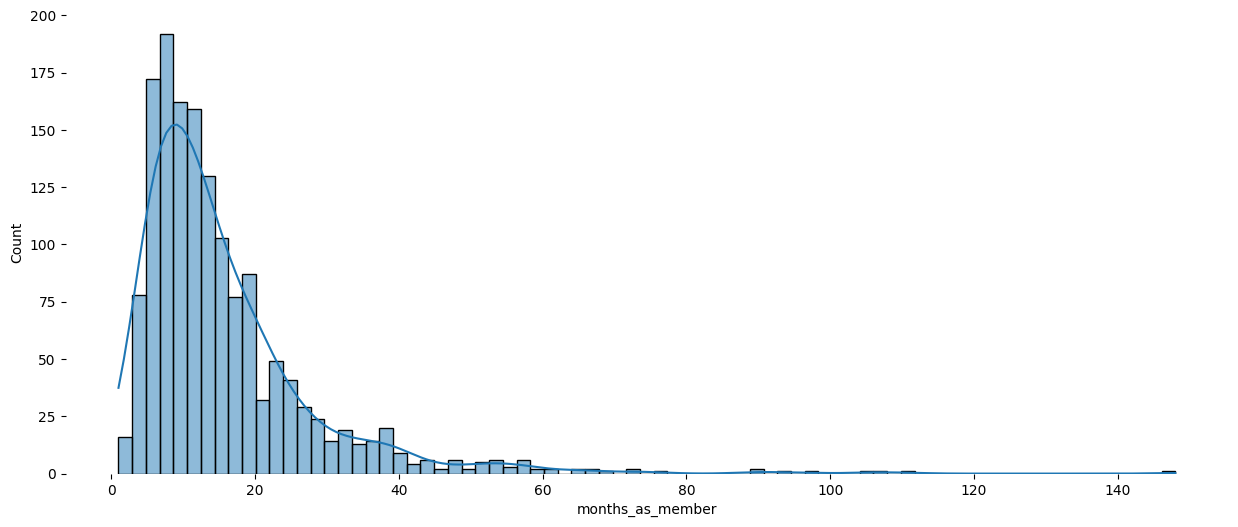

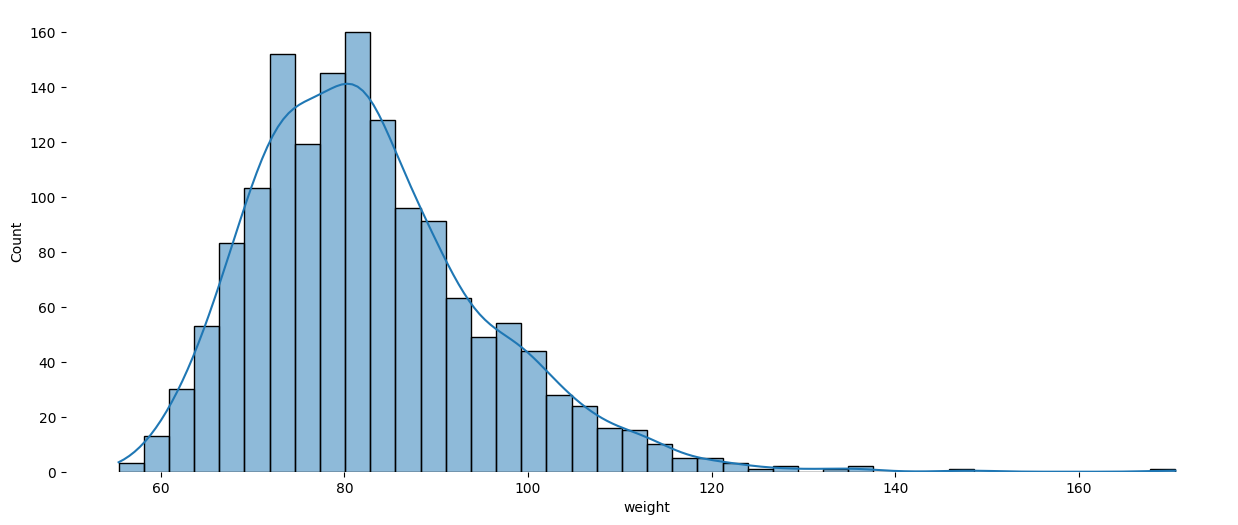

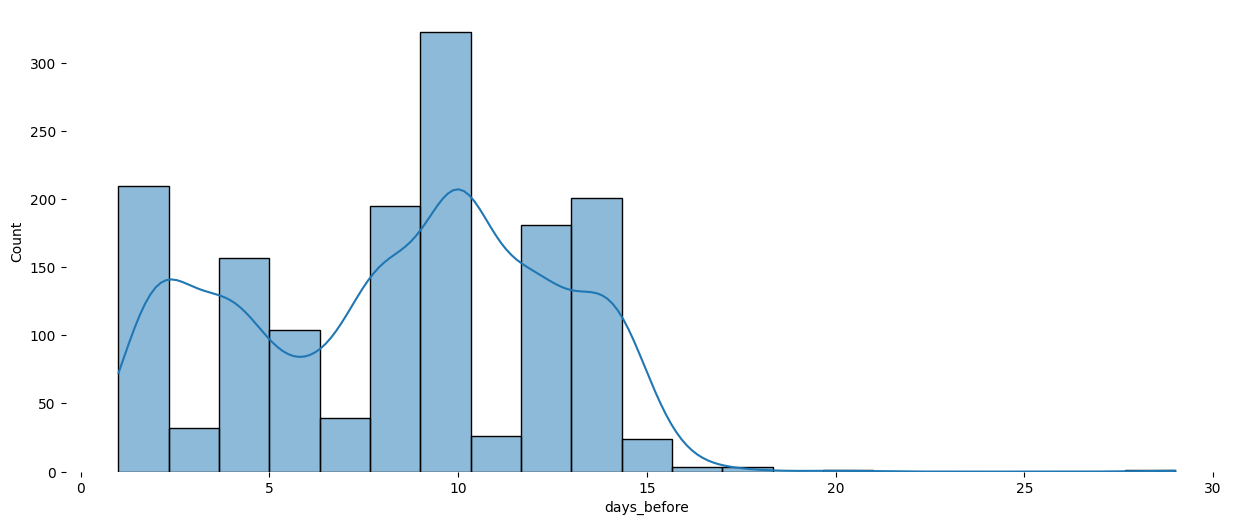

In [395]:
columns = ['months_as_member', 'weight', 'days_before']   

for i in columns:
    plt.figure(figsize=(15, 6))
    sns.histplot(data=class_attendance_df, x=i, kde=True)
    sns.despine(left=True, bottom=True)
    plt.show()

- month_as_member has a right-skewed distribution, with most members having been with the club for less than 10 months. 
- The distribution of weight is approximately normal, with a mean of 72.5 kg. 
- The distribution of days_before is right-skewed, with most members registering for classes within 10 days of the class. 

In [396]:
from scipy import stats
# Calculate the Z-scores for each data point in the 'months_as_member' column
z_scores = stats.zscore(class_attendance_df['months_as_member'])

# Define a threshold for outliers (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Find the indices of the outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

# Remove the outliers from the dataframe
class_attendance_df = class_attendance_df.drop(outlier_indices)

# Reset the index of the dataframe
class_attendance_df = class_attendance_df.reset_index(drop=True)


### Model

The model has to predict whether members will attend the class or not. The model has to be evaluated based on the accuracy of the prediction.

### Data Preprocessing

In [397]:
class_attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   months_as_member  1471 non-null   int64  
 1   weight            1471 non-null   float64
 2   days_before       1471 non-null   int64  
 3   day_of_week       1471 non-null   int64  
 4   time              1471 non-null   object 
 5   category          1471 non-null   object 
 6   attended          1471 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 80.6+ KB


In [398]:
from sklearn.preprocessing import LabelEncoder

# Encoding the category and time column
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'category' column
class_attendance_df['category'] = label_encoder.fit_transform(class_attendance_df['category'])

# Apply label encoding to the 'time' column
class_attendance_df['time'] = label_encoder.fit_transform(class_attendance_df['time'])

print(class_attendance_df.head())


   months_as_member  weight  days_before  day_of_week  time  category  \
0                17   79.56            8            3     1         4   
1                10   79.01            2            1     0         3   
2                16   74.53           14            7     0         4   
3                 5   86.12           10            5     0         2   
4                15   69.29            8            4     0         3   

   attended  
0         0  
1         0  
2         0  
3         0  
4         0  


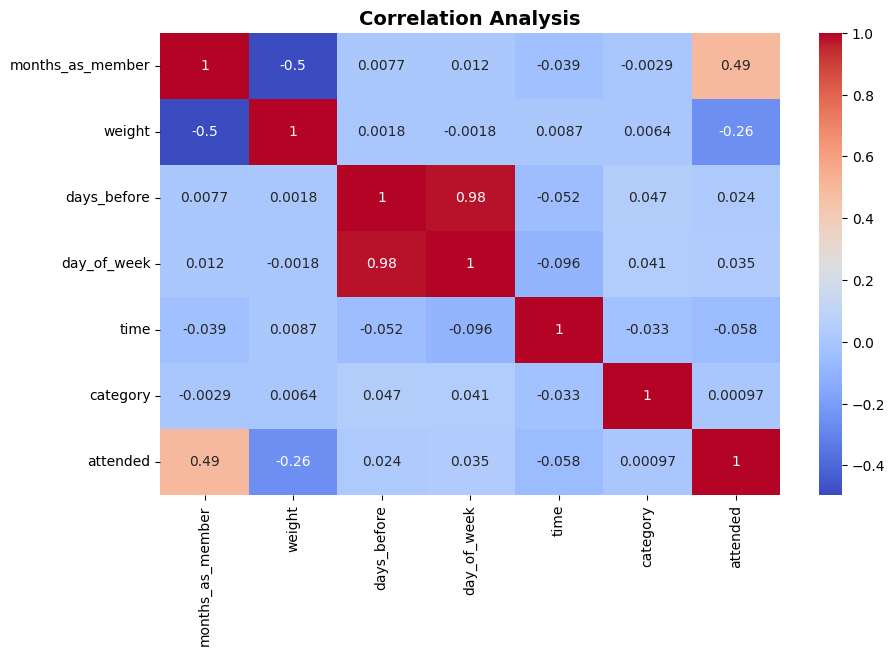

In [399]:
# Perform correlation analysis to identify the relationship between the variables
plt.figure(figsize=(10, 6))
sns.heatmap(class_attendance_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Analysis', size=14, weight="bold")

plt.show()


By looking at the correlation, we can assume that the target variable has higher correlation with months_as_member

In [400]:
# Copy all the predictor variables into X dataframe
X = class_attendance_df.drop('attended', axis=1)  #df1 is the dataframe post pre-processing
# Copy target into the y dataframe. 
y = class_attendance_df[['attended']]

In [401]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import metrics

# Split dataset into 70% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=1)

In [402]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/diegobolanos/Documents/GitHub/GoodLife_Optimization/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

0.7423728813559322


<Axes: >

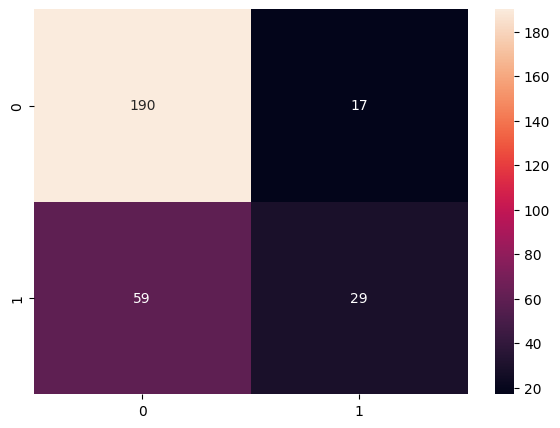

In [403]:
#For Logistic Regression Classifier
y_predict = lr.predict(X_test)
print(lr.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict)

plt.figure(figsize = (7,5))
sns.heatmap(cm,annot=True ,fmt='g')

In [404]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6304347826086957
Recall: 0.32954545454545453
F1-Score: 0.43283582089552236


Accuracy: 79.8%
This indicates that the model correctly predicts whether someone will attend or not about 79.8% of the time. This is a fairly good rate, especially in this case where the data is imbalanced (number of attendees is significantly less than the number of non-attendees).

Precision (Attendance Prediction): 58.7%
The model predicts someone will attend, this suggests the model has a moderate ability to identify actual attendees.

Recall (Identifying Actual Attendees): 38.5%
That the model misses a significant number of actual attendees, potentially leading to underestimations of attendance.

F1-Score (Balance of Precision and Recall): 46.5%
The model's balance between precision and recall is not very strong. This might be due to a significantly low recall rate, which is pulling the F1-Score down.